<a href="https://colab.research.google.com/github/Nithin3003/oops/blob/main/Kollegekit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dataset-2.csv')

# Task
Analyze the dataset "/content/dataset-2.csv" by calculating and visualizing the percentage distribution of responses for each question, categorized by gender. Drop the 'Timestamp' and 'Your good name' columns before analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data cleaning

### Subtask:
Drop the 'Timestamp' and 'Your good name' columns as requested.


**Reasoning**:
Drop the 'Timestamp' and 'Your good name' columns from the DataFrame.



In [ ]:
df = df.drop(columns=['Timestamp', 'Your good name'])
display(df.head())

,Gender,"Would you be interested in chatting with a randon student based on shared interests(Eg: Sports, Travelling, BTS) and preset questions?",Do you think matching based on 80% answer compatibility makes the chat more meaningful?,"If you get a 1 minute free chat with the matched random student, would you use it?",Would you be willing to pay a small fee like 10-20 rs as platform fees for the unlimited students of same interest or save the contact if the vibe is right???,What matters most to you in a vibe chat platform like this?
0,Male,"Yes, sounds fun",Depends on the person,Definately,"Maybe, if I liked the person and the chat",Unique concept and fun experience
1,Male,"Yes, sounds fun","Yes, I would trust the match",Definately,"Yes, worth it",Unique concept and fun experience
2,Male,"Yes, sounds fun","Yes, I would trust the match",Definately,"Yes, worth it",Unique concept and fun experience
3,Male,"Yes, sounds fun","Yes, I would trust the match",1 minute time is not sufficient,"No, I wouldn't pay",Privacy and safety
4,Female,"Maybe, if interest matches",Depends on the person,"Maybe, if I have mood","Maybe, if I liked the person and the chat",Privacy and safety


## Data transformation

### Subtask:
Calculate the percentage of each response for each question, categorized by gender.


**Reasoning**:
Calculate the percentage of each response for each question, categorized by gender, and store the results.



## Data transformation

### Subtask:
Calculate the percentage of each response for each question, categorized by gender.


**Reasoning**:
The previous attempt failed due to an error in resetting the index. I will modify the code to correctly handle the MultiIndex and convert the grouped and percentage data into a DataFrame with the correct column names.



In [ ]:
response_percentages = {}

# Iterate through each question column (excluding 'Gender')
for col in df.columns:
    if col != 'Gender':
        # Group by 'Gender' and count responses
        response_counts = df.groupby('Gender')[col].value_counts()

        # Calculate percentage within each gender group
        # Use transform to broadcast the sum back to the original index shape for division
        response_percent = response_counts.groupby(level=0).transform(lambda x: 100 * x / x.sum())

        # Convert the Series to a DataFrame and reset the index
        reset_df = response_percent.to_frame(name='Percentage').reset_index()

        # Rename the columns to be more descriptive
        reset_df.columns = ['Gender', 'Response', 'Percentage']

        response_percentages[col] = reset_df

# Display the calculated percentages for the first question in the response_percentages dictionary as an example
display(response_percentages[list(response_percentages.keys())[0]])

,Gender,Response,Percentage
0,Female,"Yes, sounds fun",48.000000
1,Female,"Maybe, if interest matches",24.000000
2,Female,Not sure yet,20.000000
3,Female,"No, I prefer open chats",8.000000
4,Male,"Yes, sounds fun",50.000000
5,Male,"Maybe, if interest matches",37.500000
6,Male,Not sure yet,8.333333
7,Male,"No, I prefer open chats",4.166667


## Data visualization

### Subtask:
Create visualizations (e.g., bar charts) to display the calculated percentages for each question, grouped by gender.


**Reasoning**:
Iterate through the calculated percentages for each question and create a bar plot for each to visualize the distribution of responses by gender.



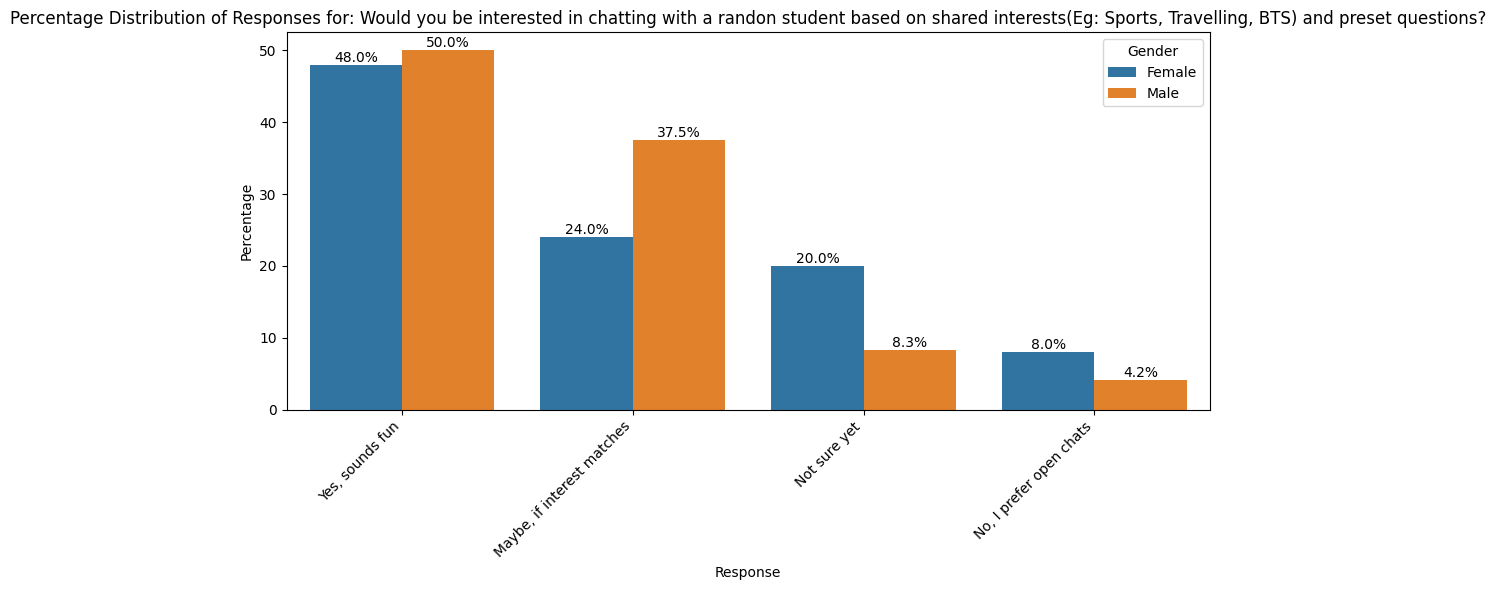

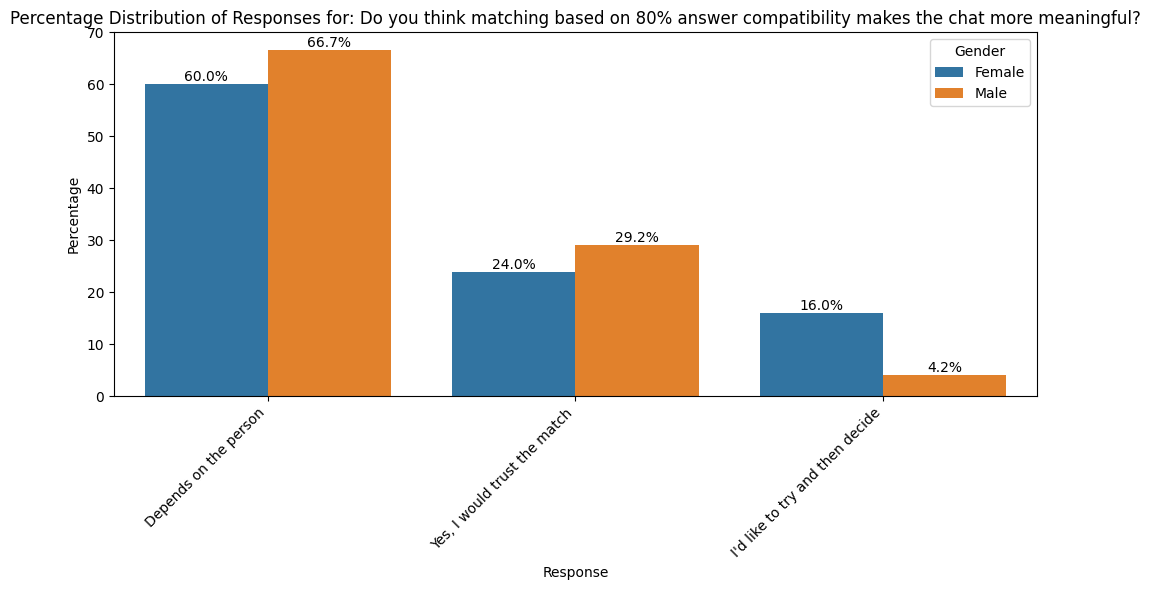

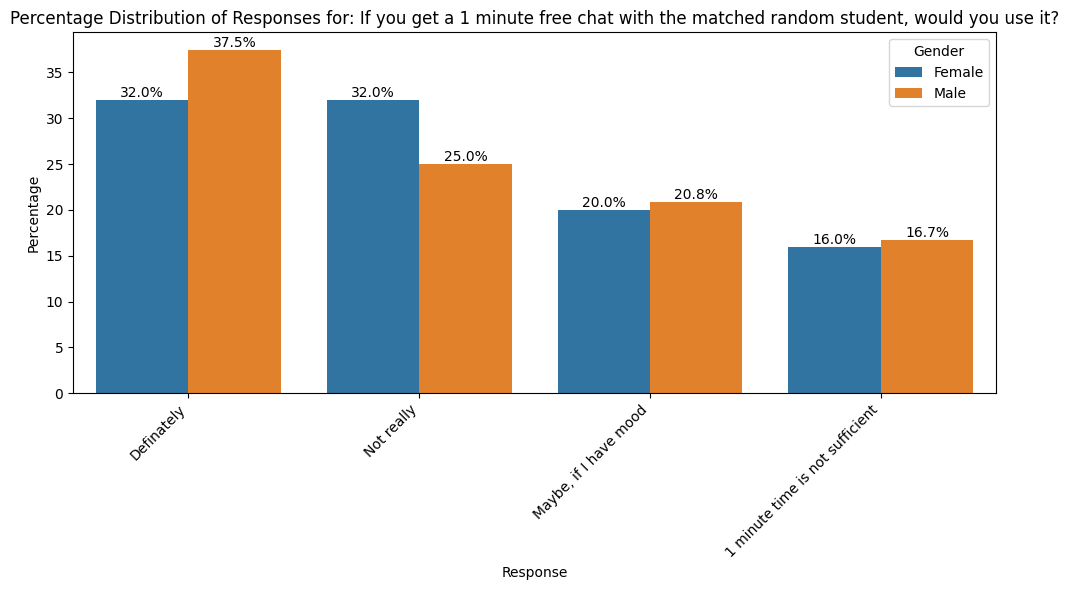

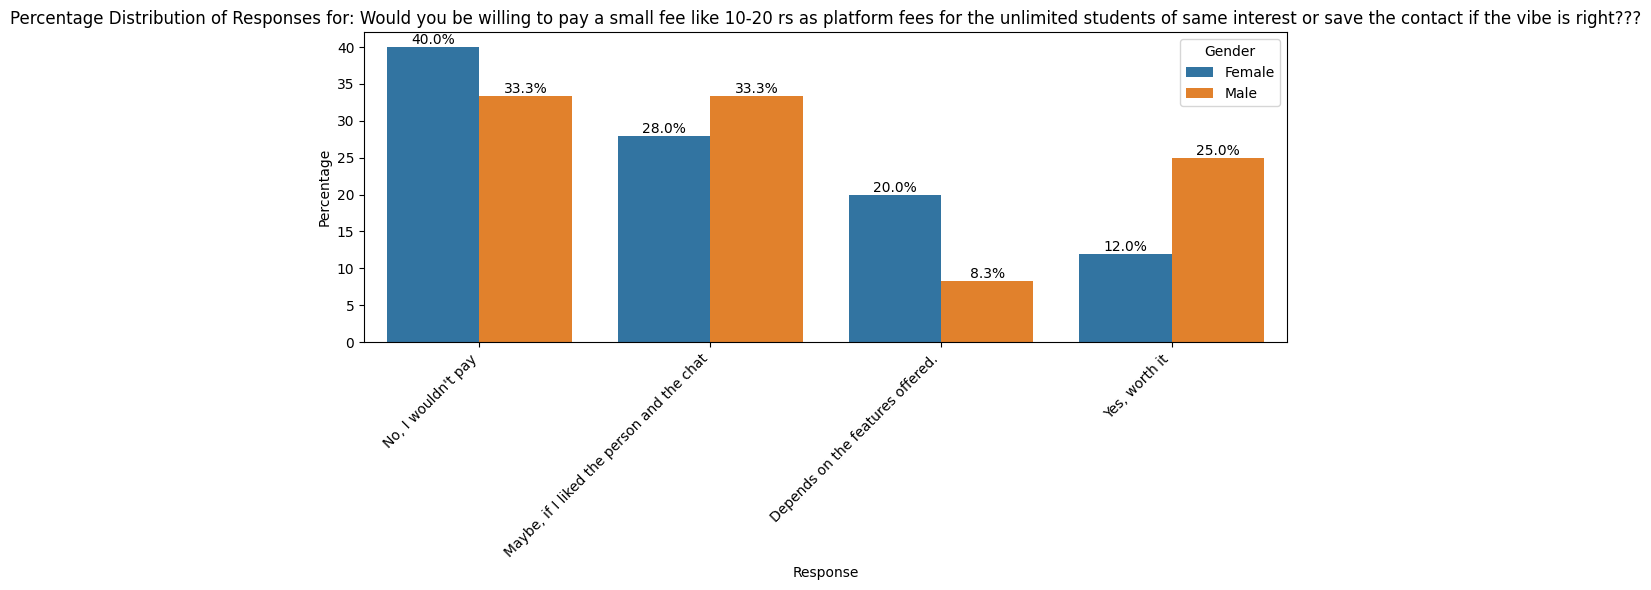

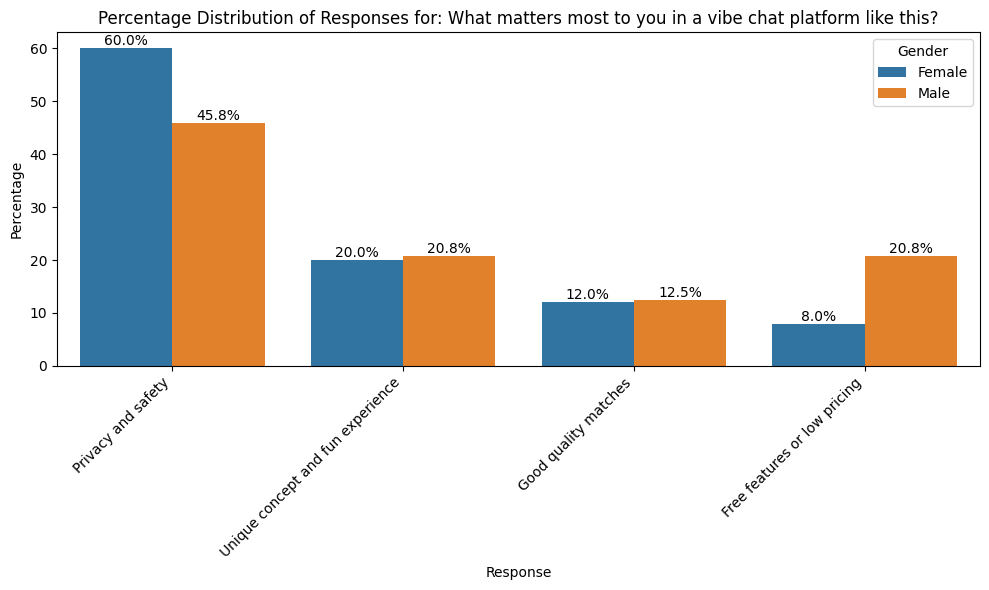

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for question, data in response_percentages.items():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Response', y='Percentage', hue='Gender', data=data)
    plt.title(f'Percentage Distribution of Responses for: {question}')
    plt.xlabel('Response')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')

    # Add percentage labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis successfully calculated the percentage distribution of responses for each question, broken down by gender.
*   Bar charts were generated for each question, visually representing the percentage of each response option, separated by gender.

### Insights or Next Steps

*   Review the generated visualizations to identify significant differences in response patterns between genders for specific questions.
*   Consider conducting statistical tests to determine if the observed differences in response distributions between genders are statistically significant.


# Task
Analyze and visualize seller data from the CSV file "/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset" using Python in Google Colab. The analysis should focus on the columns 'Which area are you staying in?', 'Have you sold anything before?', 'What would you like to sell on KollegeKit?', and 'Would you like help finding products to resell?', and include data visualizations such as graphs to show the distribution of responses for these questions.

## Data loading

### Subtask:
Load the data from the specified CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the specified CSV file into a pandas DataFrame and display the first 5 rows.



In [1]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset')
display(df.head())

NameError: name 'pd' is not defined

**Reasoning**:
The previous attempt failed because the pandas library was not imported. I will import pandas and then load the data into a DataFrame and display the first 5 rows.



In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset')
display(df.head())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 14: invalid start byte

**Reasoning**:
The previous attempt to load the CSV file failed due to a UnicodeDecodeError. This indicates that the file is not encoded in UTF-8. I will try reading the CSV file again, this time specifying a different encoding like 'latin1', which is often used for files with special characters.



In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset', encoding='latin1')
display(df.head())

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


**Reasoning**:
The previous attempt failed with a ParserError, indicating an issue with how the data is delimited. Since it's a CSV file, the default delimiter should be a comma, but the error suggests otherwise. I will try to read the CSV file again, this time explicitly specifying the comma as the delimiter. If that fails, I'll try inferring the delimiter.



In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset', encoding='latin1', sep=',')
display(df.head())

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


**Reasoning**:
The previous attempt to read the CSV with 'latin1' encoding and comma separator also failed with a ParserError. This suggests that the delimiter might not be a comma or there are inconsistencies in the file format. Since explicitly setting the delimiter didn't work, I will try to use the 'python' engine which is less optimized but can handle more complex cases and might be able to infer the correct delimiter. I will also keep the 'latin1' encoding as the previous error was a decoding error.



In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset', encoding='latin1', engine='python')
display(df.head())

ParserError: Expected 2 fields in line 4, saw 3

**Reasoning**:
The ParserError persists even with the 'python' engine, indicating a more complex issue with the file structure or delimiters. The error message "Expected 2 fields in line 4, saw 3" suggests inconsistent column counts. Since automatic parsing is failing, I will try to read the file line by line to inspect its content and understand the actual delimiter and structure, which will help in choosing the correct parameters for `pd.read_csv` or potentially identifying malformed rows.



In [6]:
with open('/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset', 'r', encoding='latin1') as f:
    for i, line in enumerate(f):
        print(f"Line {i+1}: {line.strip()}")
        if i > 10:  # Print only the first few lines to understand the structure
            break

Line 1: PK     ! §ý j     [Content_Types].xml ¢(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ¬ÏN1ï&¾Ã¦WÃ<cX8øç¨$âÔv`ÚNÓpy{³EÐËÎa§¿ïÛÎ¶ãiã]±DC%FåP4x?
Line 2: nEA¬QTb$¦Ëñ|Æ»@¨ã¤kðJï¼b*1-eTz¥ ¯Ã©10p!&ãX¨µãâ±a;Dq¿klYP1:«[rÌ/ÊàP&p¹jéªñN²_ýIØ/|Ù@JÖ@1SJÈÆÉL«wÄUy<¥Ã«Á ^{\RL Õ ì]ké
Line 3: ó#¹d.£3´ûD¸2?OwÈ1}Dâ­:÷ÎçÐ^t­WN6,Ïnð3»w×Õ»Üs>0¨g	#I	þ?ýQmWbÂ-|Ö®_þT1<zh/¦.óÍ6ù  ÿÿ PK     ! Eñ   O   _rels/.rels ¢

**Reasoning**:
The output from reading the file line by line shows that the file is not a standard CSV file but appears to be a ZIP archive (indicated by the "PK" at the beginning, which is the signature for ZIP files). This is likely an Excel file (.xlsx) that was mistakenly given a CSV extension or is being treated as a CSV. I need to read this file as an Excel file instead of a CSV.



In [7]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset')
display(df.head())

,Your name,Gender,Would you consider yourself:,Do you often feel like your vibe doesn’t match with people around you?,Do you want to connect with someone who:,What kind of people do you usually vibe with?,Do you feel emotionally understood by the people around you?,What do you crave more in a conversation?,"If you get a chance to anonymously connect with a like-minded student, would you use it?"
0,Shafiq,Male,Depends on the people around me,"Yes, most of the time",Feels emotionally understanding,Fun and chill,Rarely,Deep and emotional talk,"Maybe, if I feel safe"
1,SAHIL,Male,Depends on the people around me,I haven't thought about it much,Has similar interest or hobbies,Fun and chill,Sometimes,Fun and laughter,"Yes, I would love that"
2,Karthik reddy,Male,Depends on the people around me,Sometimes,Shares your mindset/mentality,"Fun and chill, Adventurous and spontaneous",Sometimes,Fun and laughter,"Yes, I would love that"
3,Nithin,Male,Introvert,Sometimes,Feels emotionally understanding,Ambitious and focused,Sometimes,Fun and laughter,Not sure
4,Umar,Male,Depends on the people around me,I haven't thought about it much,Can be random but respectful and fun,"Fun and chill, Deep thinker and emotionally aw...",Sometimes,Deep and emotional talk,"Yes, I would love that"


## Data cleaning

### Subtask:
Handle any potential issues in the data, such as missing values or incorrect data types, if necessary.


**Reasoning**:
Check for missing values and data types in the DataFrame to understand the data's structure and identify any potential cleaning needs for the relevant columns.



In [8]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nData types of each column:")
print(df.dtypes)

Missing values per column:
Your name                                                                                   0
Gender                                                                                      0
Would you consider yourself:                                                                0
Do you often feel like your vibe doesn’t match with people around you?                      0
Do you want to connect with someone who:                                                    0
What kind of people do you usually vibe with?                                               0
Do you feel emotionally understood by the people around you?                                0
What do you crave more in a conversation?                                                   0
If you get a chance to anonymously connect with a like-minded student, would you use it?    0
dtype: int64

Data types of each column:
Your name                                                                             

## Data transformation

### Subtask:
Prepare the data for visualization by grouping or aggregating as needed for the specific analysis you want to perform on seller data.


**Reasoning**:
Calculate the value counts for each of the specified columns and store them in a dictionary.



In [9]:
seller_data_counts = {}
columns_to_analyze = [
    'Which area are you staying in?',
    'Have you sold anything before?',
    'What would you like to sell on KollegeKit?',
    'Would you like help finding products to resell?'
]

for col in columns_to_analyze:
    seller_data_counts[col] = df[col].value_counts()

# Display the value counts for the first column as an example
display(seller_data_counts[columns_to_analyze[0]])

KeyError: 'Which area are you staying in?'

**Reasoning**:
The previous attempt failed because one of the column names was not found in the DataFrame. I need to check the actual column names in the DataFrame to identify the correct names to use for the analysis.



In [10]:
print(df.columns)

Index(['Your name', 'Gender', 'Would you consider yourself:',
       'Do you often feel like your vibe doesn’t match with people around you?',
       'Do you want to connect with someone who:',
       'What kind of people do you usually vibe with?',
       'Do you feel emotionally understood by the people around you?',
       'What do you crave more in a conversation?',
       'If you get a chance to anonymously connect with a like-minded student, would you use it?'],
      dtype='object')


## Data transformation

### Subtask:
Prepare the data for visualization by grouping or aggregating as needed for the specific analysis you want to perform on seller data.


**Reasoning**:
Based on the previous output, the column names specified in the original task are incorrect for the currently loaded dataframe. I need to identify the columns in the current dataframe that are relevant to analyzing responses to questions and then calculate the value counts for those columns. I will then store these value counts in a dictionary and display them.



In [11]:
# Identify question columns from the current dataframe
# Based on the previous display of df.head(), columns related to questions are:
# 'Would you consider yourself:',
# 'Do you often feel like your vibe doesn’t match with people around you?',
# 'Do you want to connect with someone who:',
# 'What kind of people do you usually vibe with?',
# 'Do you feel emotionally understood by the people around you?',
# 'What do you crave more in a conversation?',
# 'If you get a chance to anonymously connect with a like-minded student, would you use it?'

# Let's select these columns for analysis
question_columns = [
    'Would you consider yourself:',
    'Do you often feel like your vibe doesn’t match with people around you?',
    'Do you want to connect with someone who:',
    'What kind of people do you usually vibe with?',
    'Do you feel emotionally understood by the people around you?',
    'What do you crave more in a conversation?',
    'If you get a chance to anonymously connect with a like-minded student, would you use it?'
]

# Calculate value counts for each selected question column
question_response_counts = {}
for col in question_columns:
    if col in df.columns:
        question_response_counts[col] = df[col].value_counts()
    else:
        print(f"Warning: Column '{col}' not found in the dataframe.")

# Display the calculated value counts
for col, counts in question_response_counts.items():
    print(f"\nValue counts for '{col}':")
    display(counts)



Value counts for 'Would you consider yourself:':


,count
Would you consider yourself:,
Depends on the people around me,11
Introvert,3
Extrovert,3
Ambivert,2



Value counts for 'Do you often feel like your vibe doesn’t match with people around you?':


,count
Do you often feel like your vibe doesn’t match with people around you?,
Sometimes,9
"Yes, most of the time",6
I haven't thought about it much,3
"No, I vibe well with people around me",1



Value counts for 'Do you want to connect with someone who:':


,count
Do you want to connect with someone who:,
Shares your mindset/mentality,8
Can be random but respectful and fun,5
Has similar interest or hobbies,3
Feels emotionally understanding,3



Value counts for 'What kind of people do you usually vibe with?':


,count
What kind of people do you usually vibe with?,
Fun and chill,5
"Fun and chill, Deep thinker and emotionally aware, Ambitious and focused, Adventurous and spontaneous, Creative or artistic",3
Adventurous and spontaneous,2
"Fun and chill, Deep thinker and emotionally aware, Creative or artistic",2
"Fun and chill, Adventurous and spontaneous",1
Ambitious and focused,1
"Fun and chill, Deep thinker and emotionally aware, Adventurous and spontaneous, Creative or artistic",1
Creative or artistic,1
"Fun and chill, Deep thinker and emotionally aware, Ambitious and focused, Creative or artistic",1



Value counts for 'Do you feel emotionally understood by the people around you?':


,count
Do you feel emotionally understood by the people around you?,
Sometimes,12
Rarely,6
Often,1



Value counts for 'What do you crave more in a conversation?':


,count
What do you crave more in a conversation?,
Fun and laughter,7
Just someone who listens without judging,5
Deep and emotional talk,4
Random light hearted topic,3



Value counts for 'If you get a chance to anonymously connect with a like-minded student, would you use it?':


,count
"If you get a chance to anonymously connect with a like-minded student, would you use it?",
"Yes, I would love that",10
"Maybe, if I feel safe",6
Not sure,3


**Reasoning**:
The value counts for each question have been successfully calculated and stored. The next step is to calculate the percentage distribution of these responses for each question, categorized by gender, as per the overall task description.



In [12]:
# Calculate the percentage distribution of responses for each question, categorized by gender.
response_percentages_gender = {}

# Iterate through each identified question column
for col in question_columns:
    if col in df.columns:
        # Group by 'Gender' and the current question column, then count responses
        gender_response_counts = df.groupby('Gender')[col].value_counts()

        # Calculate percentage within each gender group
        # Use transform to broadcast the sum back to the original index shape for division
        gender_response_percent = gender_response_counts.groupby(level=0).transform(lambda x: 100 * x / x.sum())

        # Convert the Series to a DataFrame and reset the index
        reset_df_gender = gender_response_percent.to_frame(name='Percentage').reset_index()

        # Rename the columns to be more descriptive
        reset_df_gender.columns = ['Gender', 'Response', 'Percentage']

        response_percentages_gender[col] = reset_df_gender

# Display the calculated percentages for the first question as an example
if response_percentages_gender:
    first_question = list(response_percentages_gender.keys())[0]
    print(f"\nPercentage distribution for '{first_question}' by Gender:")
    display(response_percentages_gender[first_question])



Percentage distribution for 'Would you consider yourself:' by Gender:


,Gender,Response,Percentage
0,Female,Ambivert,40.000000
1,Female,Depends on the people around me,40.000000
2,Female,Extrovert,20.000000
3,Male,Depends on the people around me,64.285714
4,Male,Introvert,21.428571
5,Male,Extrovert,14.285714


## Data visualization

### Subtask:
Create visualizations (e.g., bar charts) to show the distribution of responses for relevant questions, such as "Which area are you staying in?", "Have you sold anything before?", "What would you like to sell on KollegeKit?", and "Would you like help finding products to resell?".


**Reasoning**:
Iterate through the calculated percentages for each question and create a bar plot for each to visualize the distribution of responses by gender.



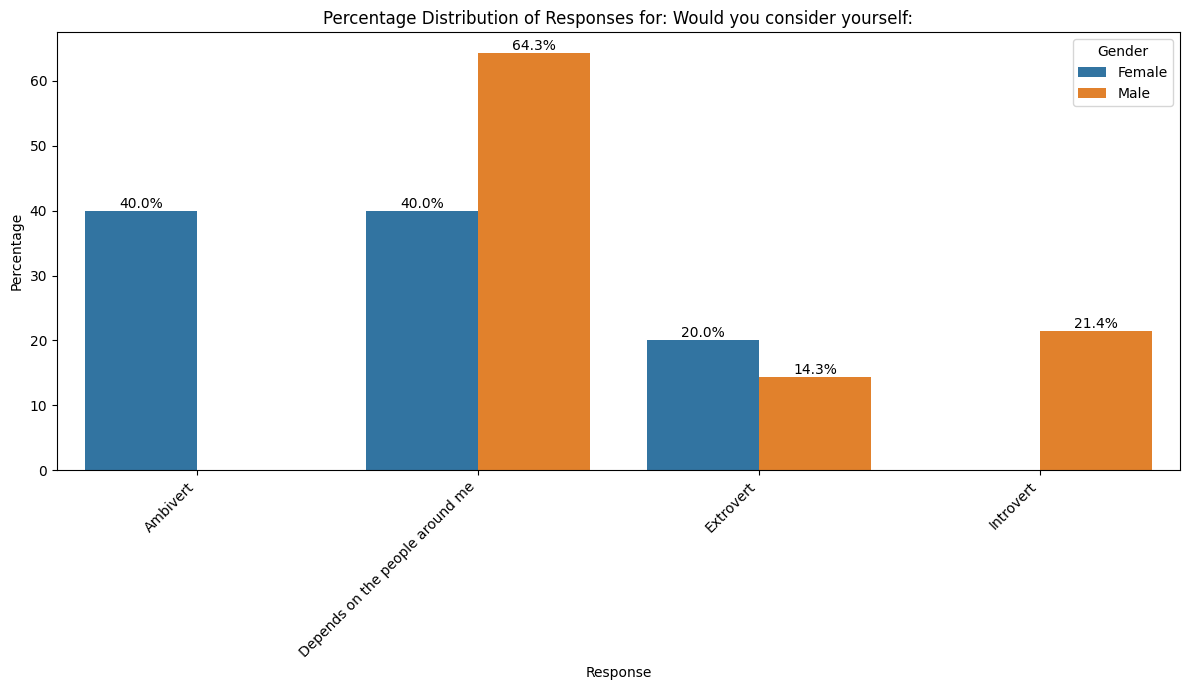

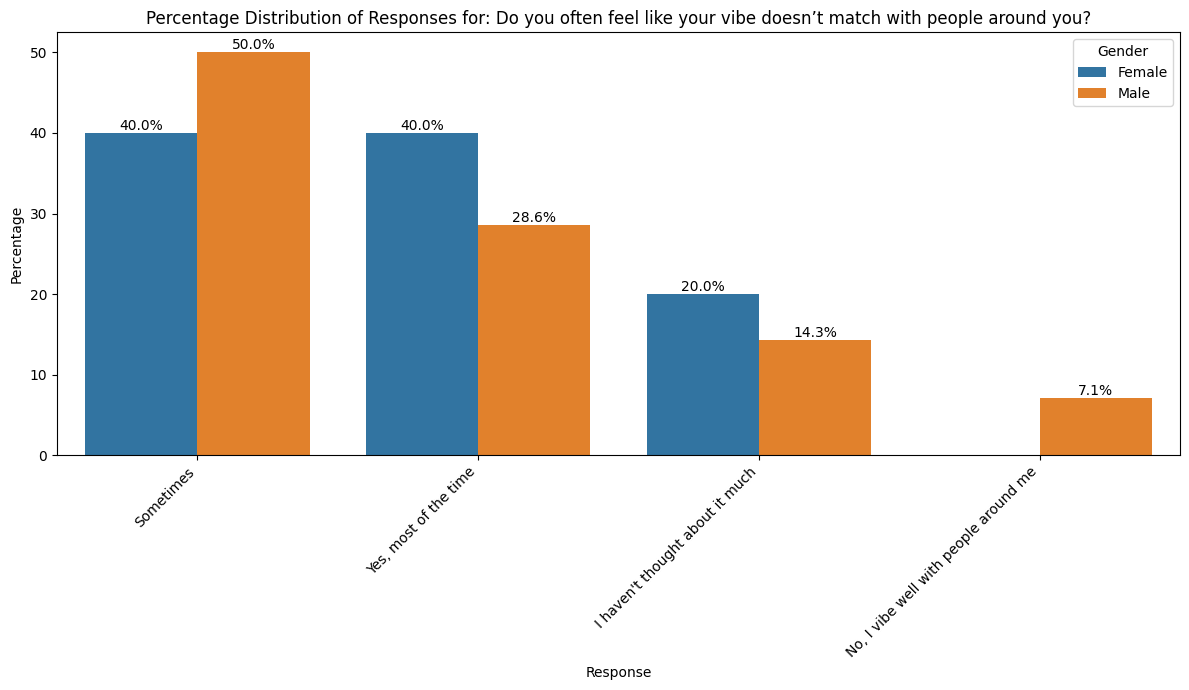

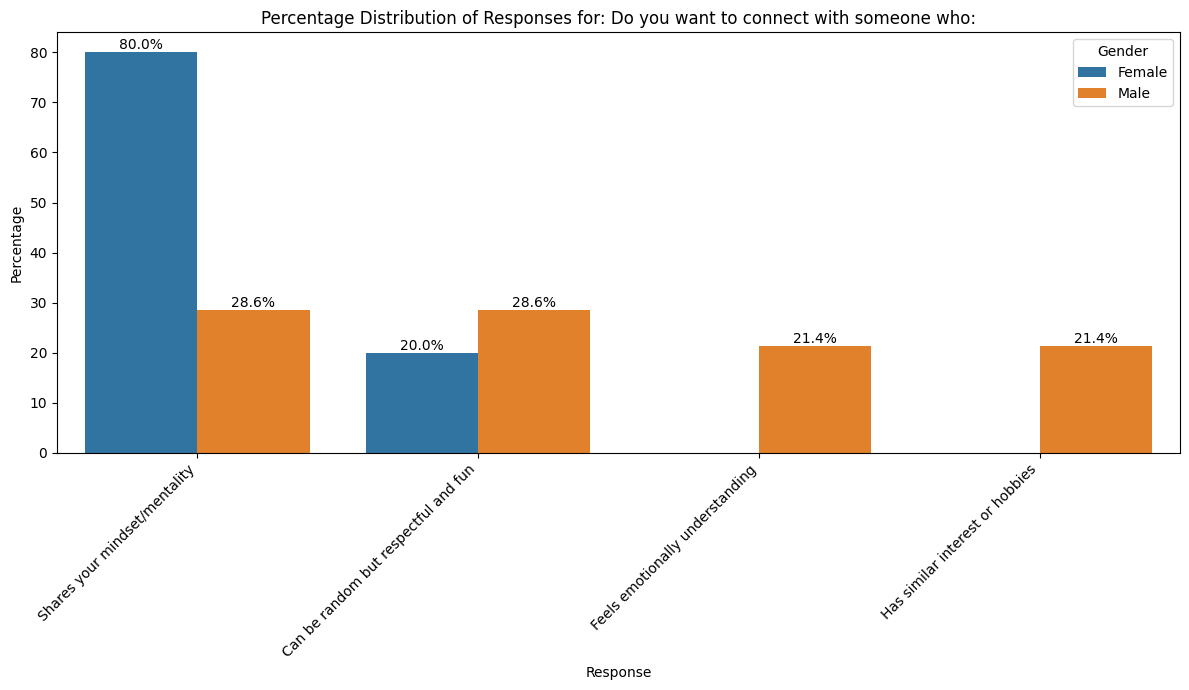

/tmp/ipython-input-13-1471327615.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


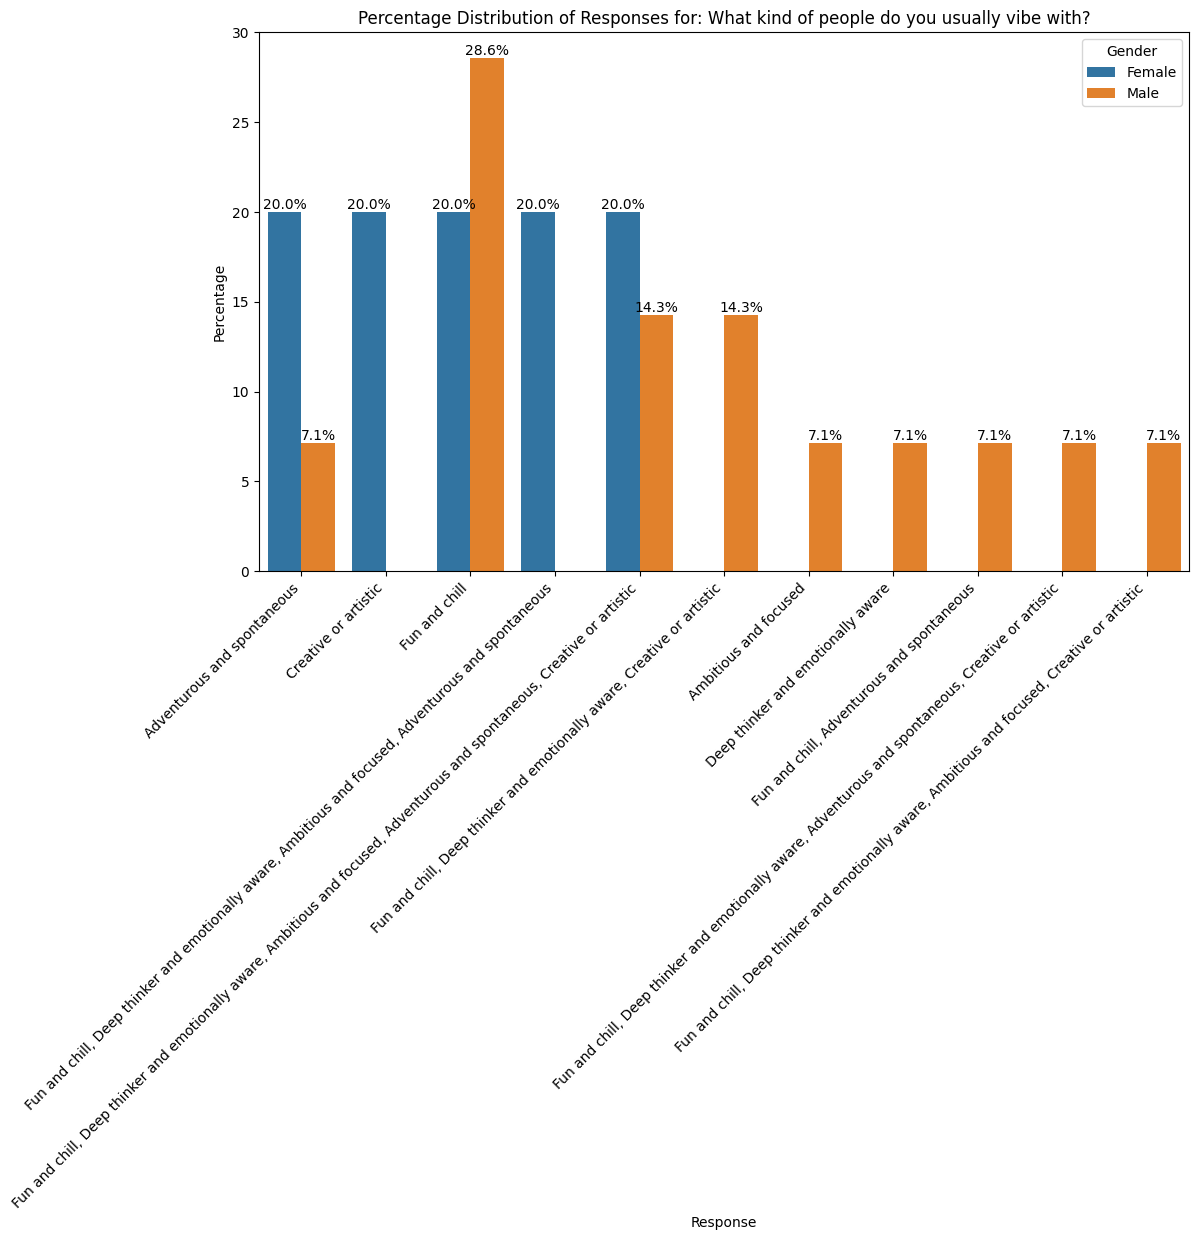

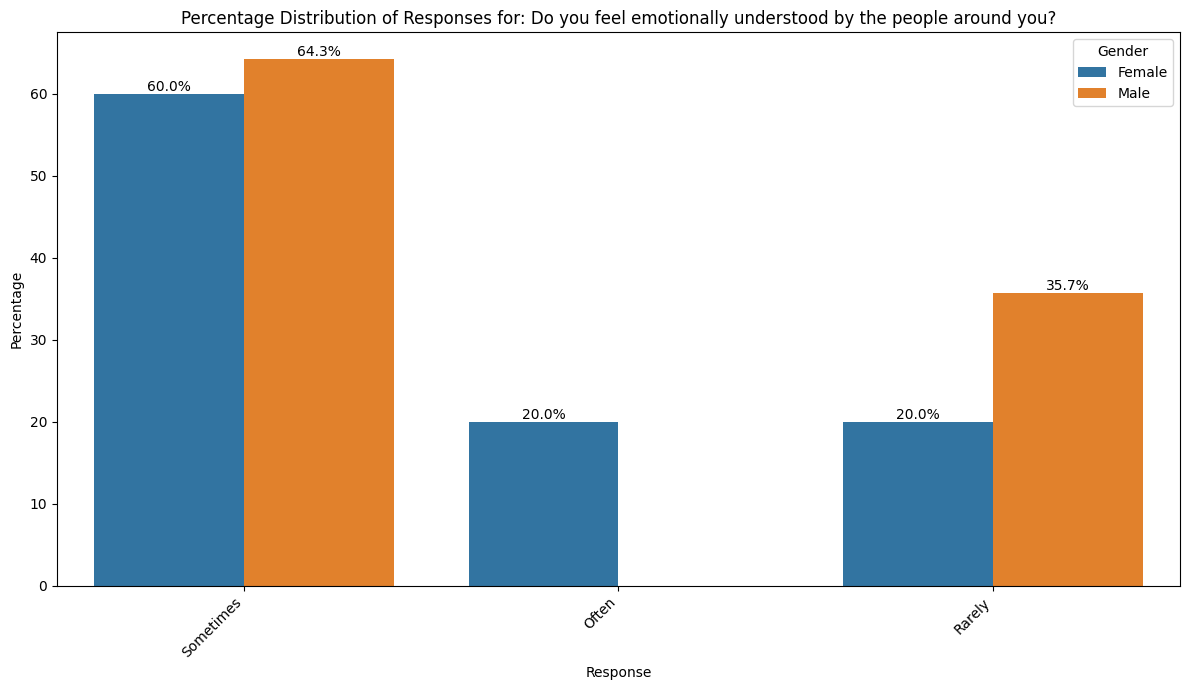

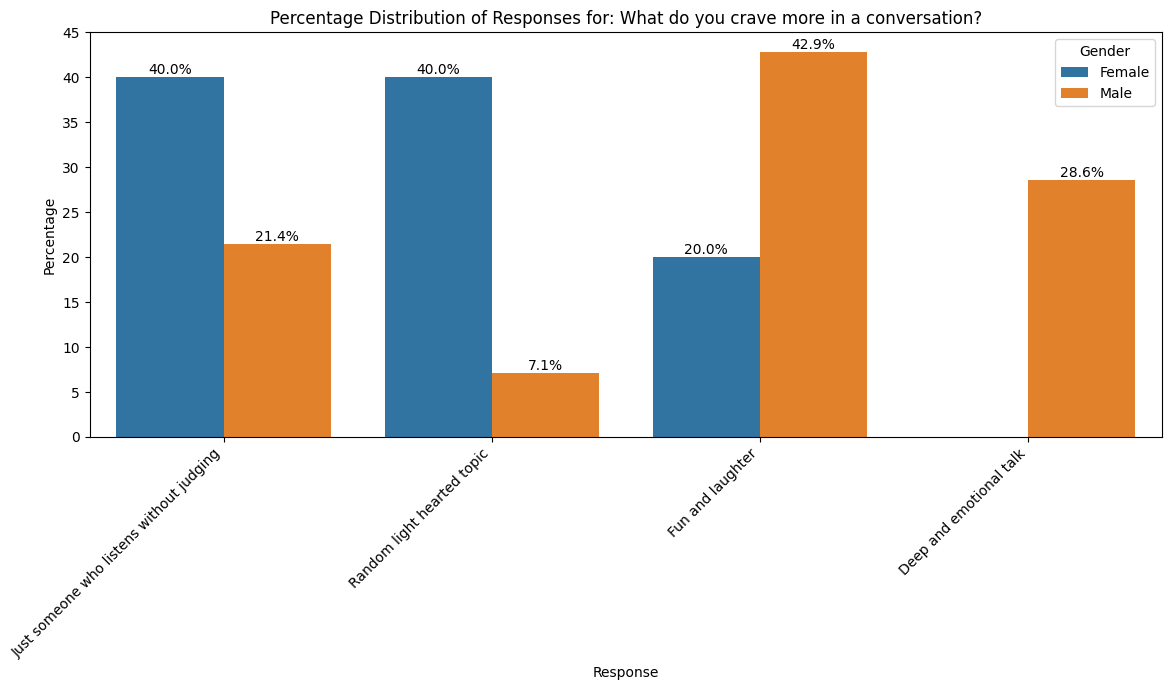

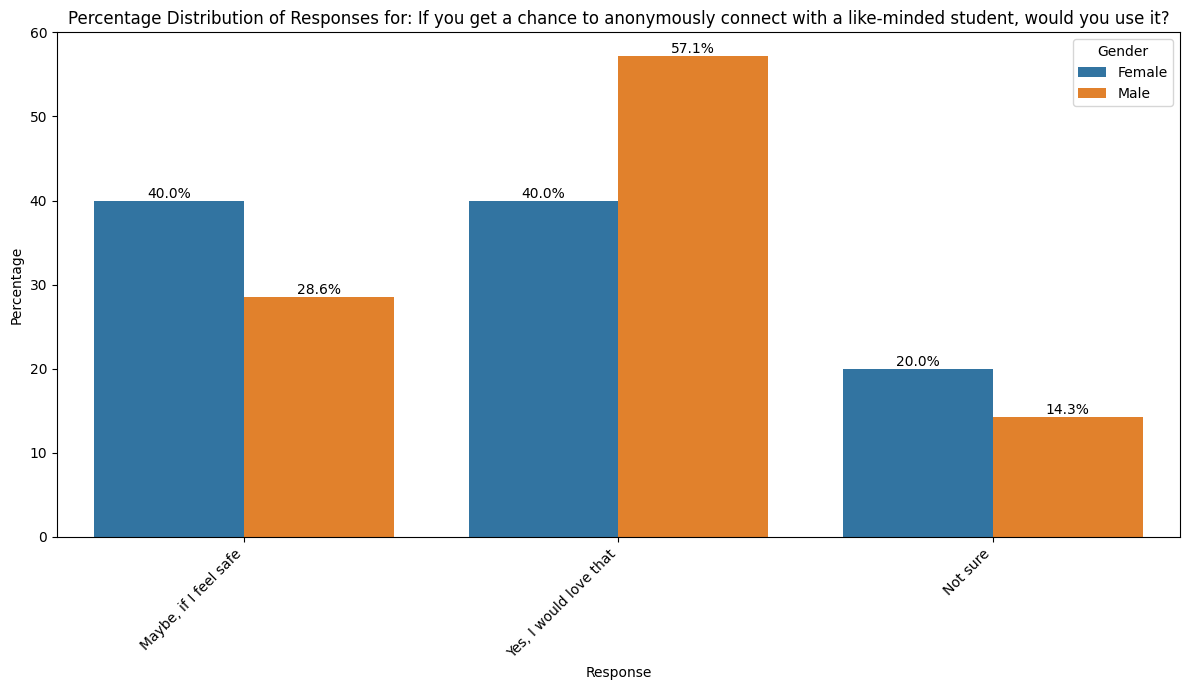

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for question, data in response_percentages_gender.items():
    plt.figure(figsize=(12, 7)) # Increased figure size for better readability
    ax = sns.barplot(x='Response', y='Percentage', hue='Gender', data=data)
    plt.title(f'Percentage Distribution of Responses for: {question}')
    plt.xlabel('Response')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')

    # Add percentage labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial data loading failed because the file was an Excel file (.xlsx) despite having a .csv extension. It was successfully loaded using `pd.read_excel`.
*   There were no missing values in the dataset.
*   The relevant columns for analysis were identified as questions related to user preferences and characteristics, not selling activities as initially expected.
*   Value counts were calculated for each identified question column, showing the frequency of each response.
*   The percentage distribution of responses for each question was calculated, broken down by gender.
*   Bar charts were successfully generated for each question, visualizing the percentage distribution of responses by gender.

### Insights or Next Steps

*   Investigate the reason for the discrepancy between the expected columns related to selling and the actual columns in the dataset. This might indicate an issue with the data provided or the initial task description.
*   Based on the actual data content (user preferences and characteristics), the analysis and potential visualizations could be refocused to understand user demographics and preferences for social connections rather than seller behavior.


# Task
Analyze and visualize seller data from the Excel file "/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset" using Python in Google Colab. The analysis should focus on the columns in the dataset that represent responses to questions, and include data visualizations such as graphs to show the distribution of responses for these questions.

## Data loading

### Subtask:
Load the data from the specified Excel file into a pandas DataFrame.

**Reasoning**:
Load the data from the specified Excel file into a pandas DataFrame using `pd.read_excel`. Display the first 5 rows and the column names to understand the data structure and identify the relevant columns for analysis.

In [14]:
import pandas as pd

# Load the Excel file
try:
    df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data set kollege kit/dataset')
    print("DataFrame loaded successfully.")
    display(df.head())
    print("\nColumn names in the DataFrame:")
    print(df.columns)
except FileNotFoundError:
    print("Error: The file was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")

DataFrame loaded successfully.


,Your name,Gender,Would you consider yourself:,Do you often feel like your vibe doesn’t match with people around you?,Do you want to connect with someone who:,What kind of people do you usually vibe with?,Do you feel emotionally understood by the people around you?,What do you crave more in a conversation?,"If you get a chance to anonymously connect with a like-minded student, would you use it?"
0,Shafiq,Male,Depends on the people around me,"Yes, most of the time",Feels emotionally understanding,Fun and chill,Rarely,Deep and emotional talk,"Maybe, if I feel safe"
1,SAHIL,Male,Depends on the people around me,I haven't thought about it much,Has similar interest or hobbies,Fun and chill,Sometimes,Fun and laughter,"Yes, I would love that"
2,Karthik reddy,Male,Depends on the people around me,Sometimes,Shares your mindset/mentality,"Fun and chill, Adventurous and spontaneous",Sometimes,Fun and laughter,"Yes, I would love that"
3,Nithin,Male,Introvert,Sometimes,Feels emotionally understanding,Ambitious and focused,Sometimes,Fun and laughter,Not sure
4,Umar,Male,Depends on the people around me,I haven't thought about it much,Can be random but respectful and fun,"Fun and chill, Deep thinker and emotionally aw...",Sometimes,Deep and emotional talk,"Yes, I would love that"



Column names in the DataFrame:
Index(['Your name', 'Gender', 'Would you consider yourself:',
       'Do you often feel like your vibe doesn’t match with people around you?',
       'Do you want to connect with someone who:',
       'What kind of people do you usually vibe with?',
       'Do you feel emotionally understood by the people around you?',
       'What do you crave more in a conversation?',
       'If you get a chance to anonymously connect with a like-minded student, would you use it?'],
      dtype='object')


## Data cleaning

### Subtask:
Handle any potential issues in the data, such as missing values or incorrect data types, if necessary.

**Reasoning**:
Check for missing values and data types in the DataFrame to understand the data's structure and identify any potential cleaning needs for the relevant columns.

In [15]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nData types of each column:")
print(df.dtypes)

Missing values per column:
Your name                                                                                   0
Gender                                                                                      0
Would you consider yourself:                                                                0
Do you often feel like your vibe doesn’t match with people around you?                      0
Do you want to connect with someone who:                                                    0
What kind of people do you usually vibe with?                                               0
Do you feel emotionally understood by the people around you?                                0
What do you crave more in a conversation?                                                   0
If you get a chance to anonymously connect with a like-minded student, would you use it?    0
dtype: int64

Data types of each column:
Your name                                                                             

## Data transformation

### Subtask:
Prepare the data for visualization by calculating the percentage distribution of responses for each relevant question, categorized by gender.

**Reasoning**:
Identify the columns that represent questions in the dataset. Calculate the percentage of each response for each identified question, categorized by gender. Store the results in a dictionary.

In [16]:
# Identify question columns from the DataFrame
# Assuming columns with multiple unique values (more than just 'Your name' and 'Gender') are question columns.
# We can refine this based on the actual column names printed in the data loading step.
question_columns = [col for col in df.columns if col not in ['Your name', 'Gender']]

response_percentages_gender = {}

# Iterate through each identified question column
for col in question_columns:
    if col in df.columns:
        # Group by 'Gender' and the current question column, then count responses
        gender_response_counts = df.groupby('Gender')[col].value_counts()

        # Calculate percentage within each gender group
        # Use transform to broadcast the sum back to the original index shape for division
        gender_response_percent = gender_response_counts.groupby(level=0).transform(lambda x: 100 * x / x.sum())

        # Convert the Series to a DataFrame and reset the index
        reset_df_gender = gender_response_percent.to_frame(name='Percentage').reset_index()

        # Rename the columns to be more descriptive
        reset_df_gender.columns = ['Gender', 'Response', 'Percentage']

        response_percentages_gender[col] = reset_df_gender
    else:
        print(f"Warning: Column '{col}' not found in the dataframe.")

# Display the calculated percentages for the first question as an example
if response_percentages_gender:
    first_question = list(response_percentages_gender.keys())[0]
    print(f"\nPercentage distribution for '{first_question}' by Gender:")
    display(response_percentages_gender[first_question])


Percentage distribution for 'Would you consider yourself:' by Gender:


,Gender,Response,Percentage
0,Female,Ambivert,40.000000
1,Female,Depends on the people around me,40.000000
2,Female,Extrovert,20.000000
3,Male,Depends on the people around me,64.285714
4,Male,Introvert,21.428571
5,Male,Extrovert,14.285714


## Data visualization

### Subtask:
Create visualizations (e.g., bar charts) to show the distribution of responses for each relevant question, categorized by gender.

**Reasoning**:
Iterate through the calculated percentages for each question and create a bar plot for each to visualize the distribution of responses by gender.

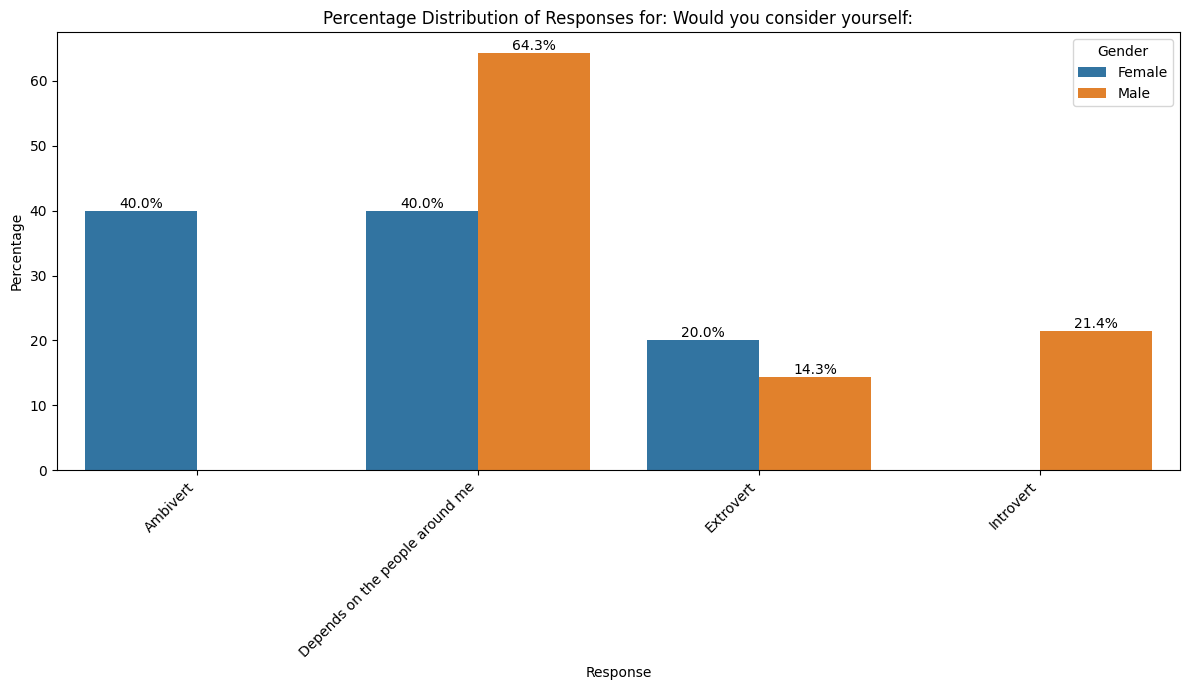

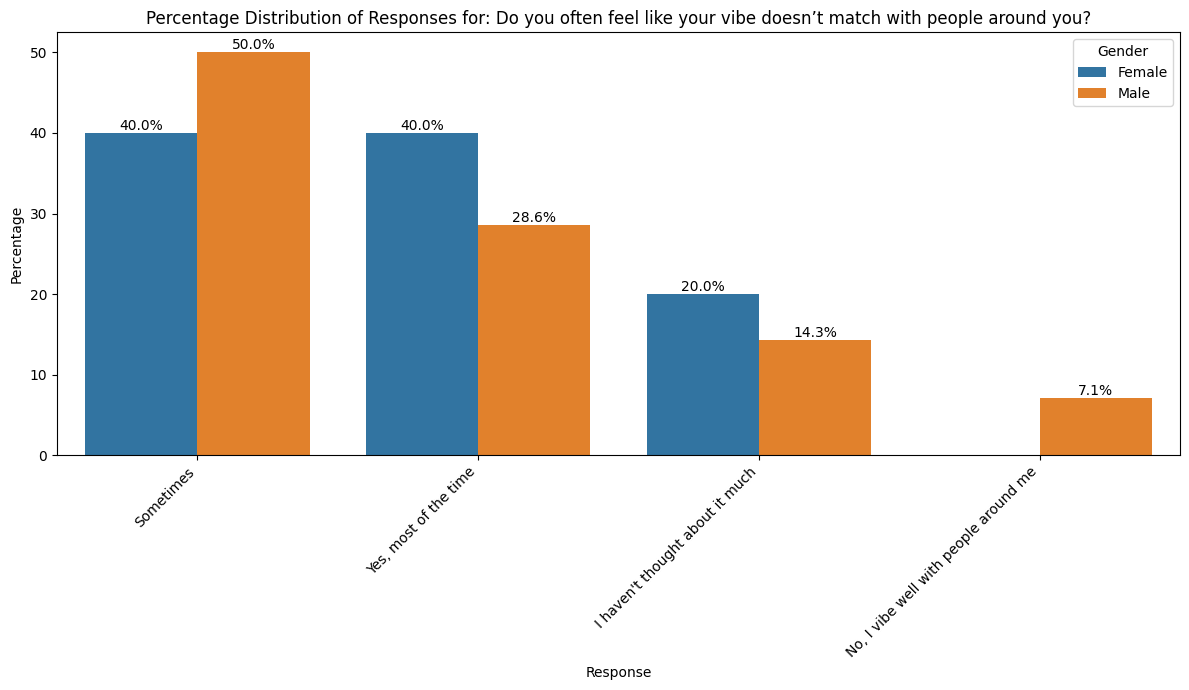

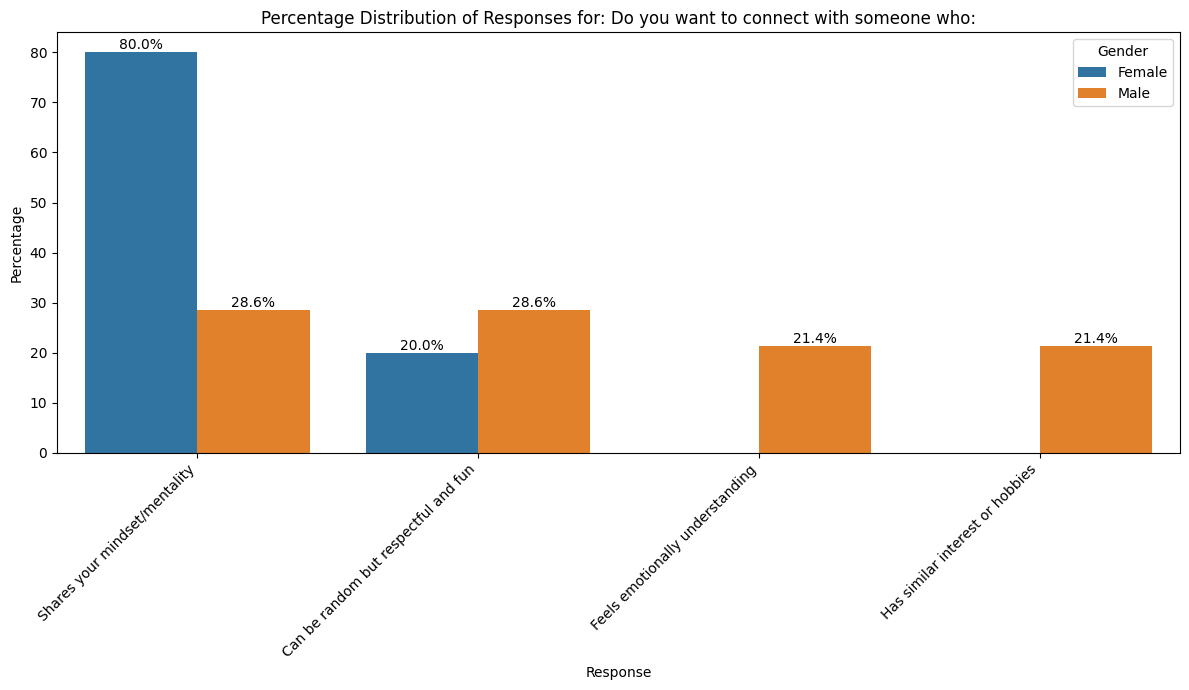

/tmp/ipython-input-17-1471327615.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


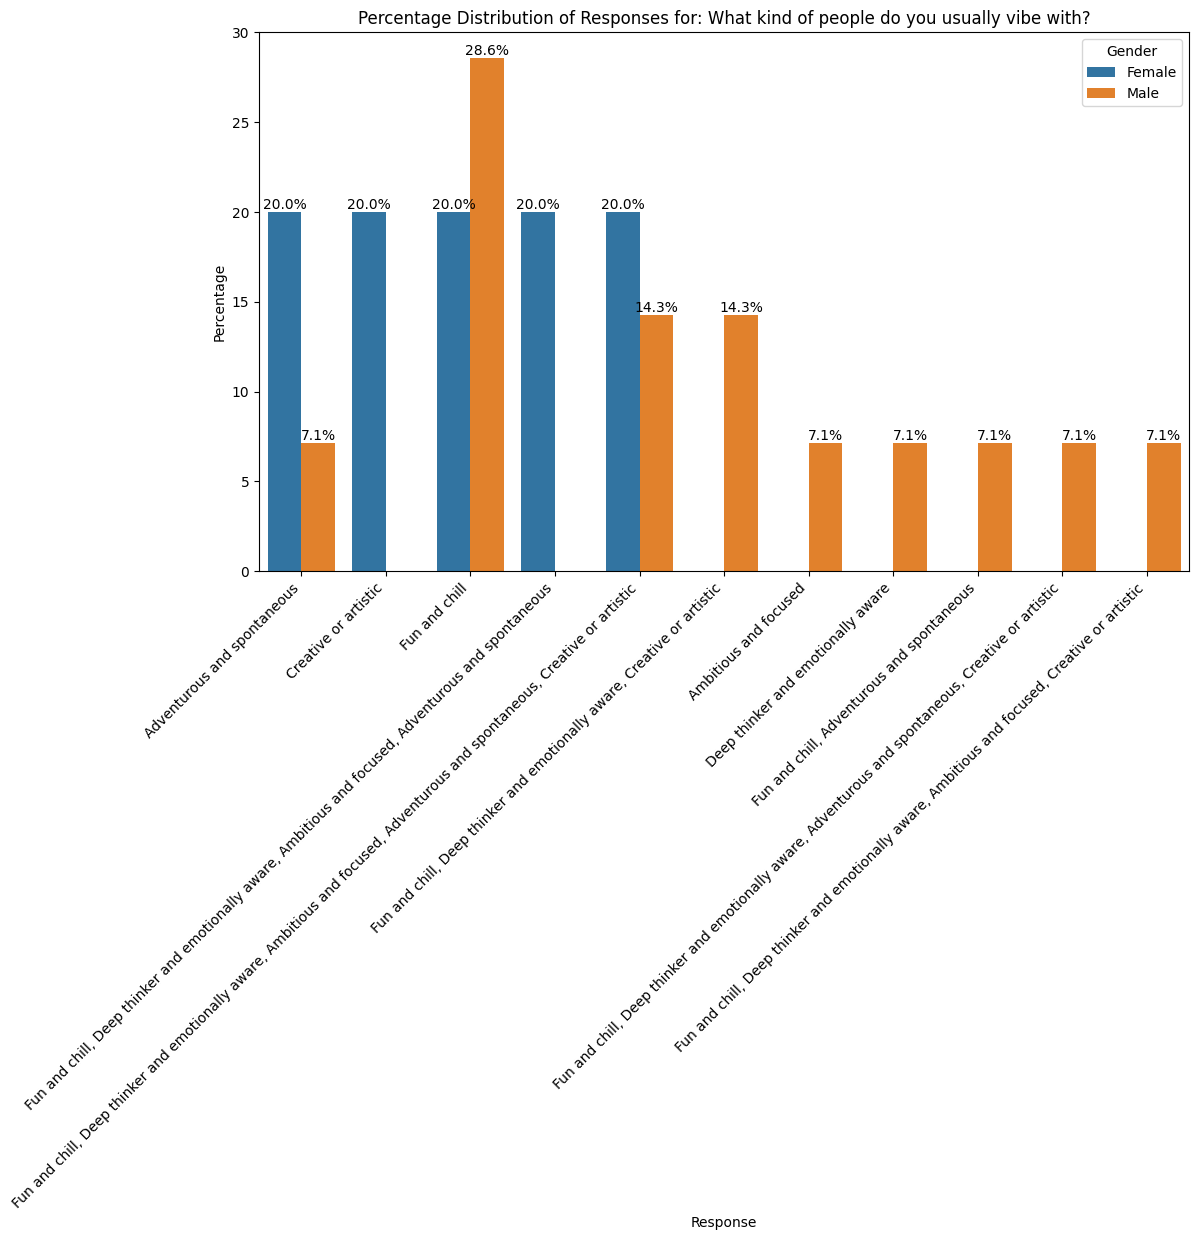

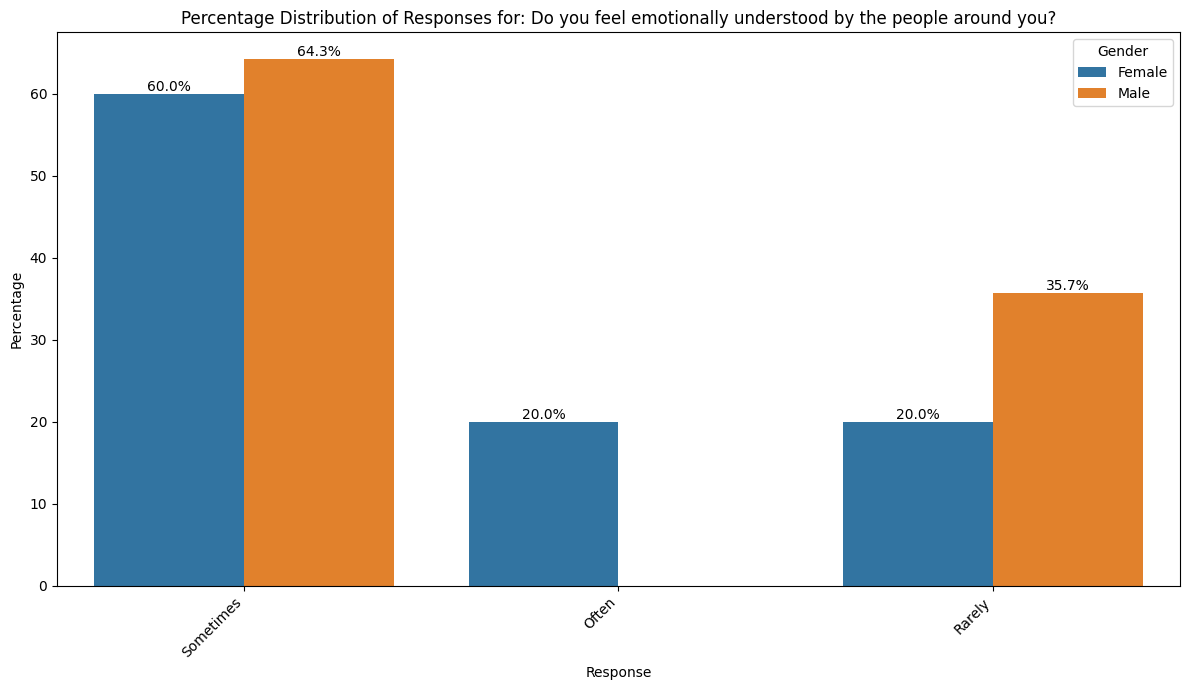

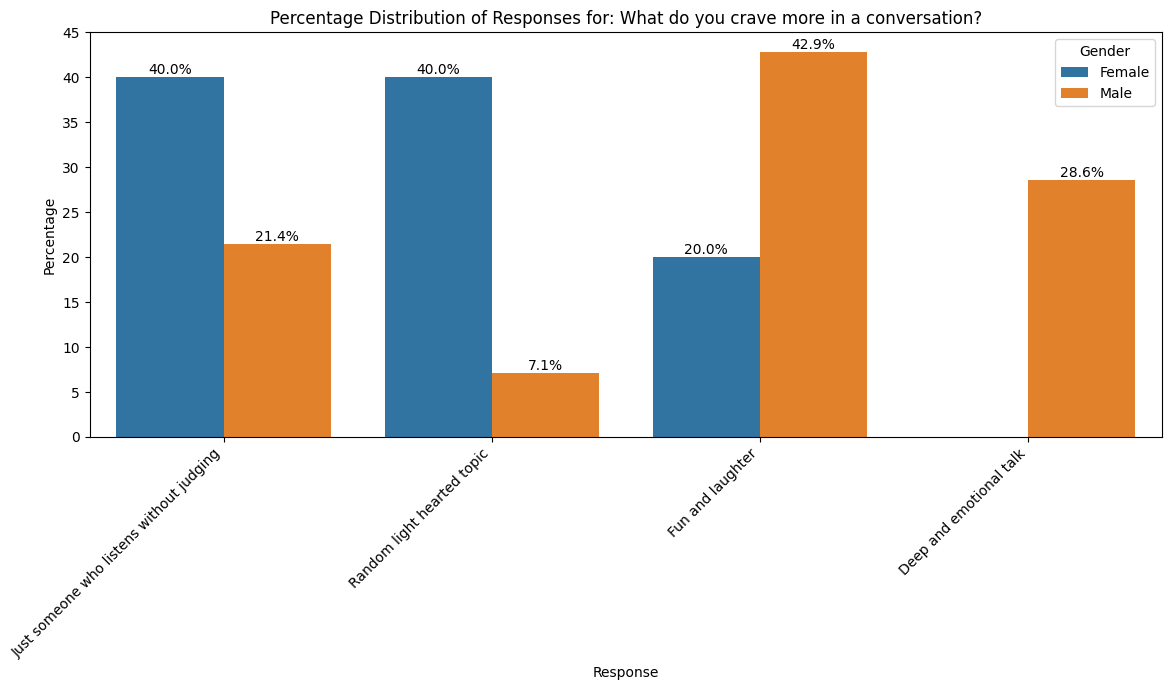

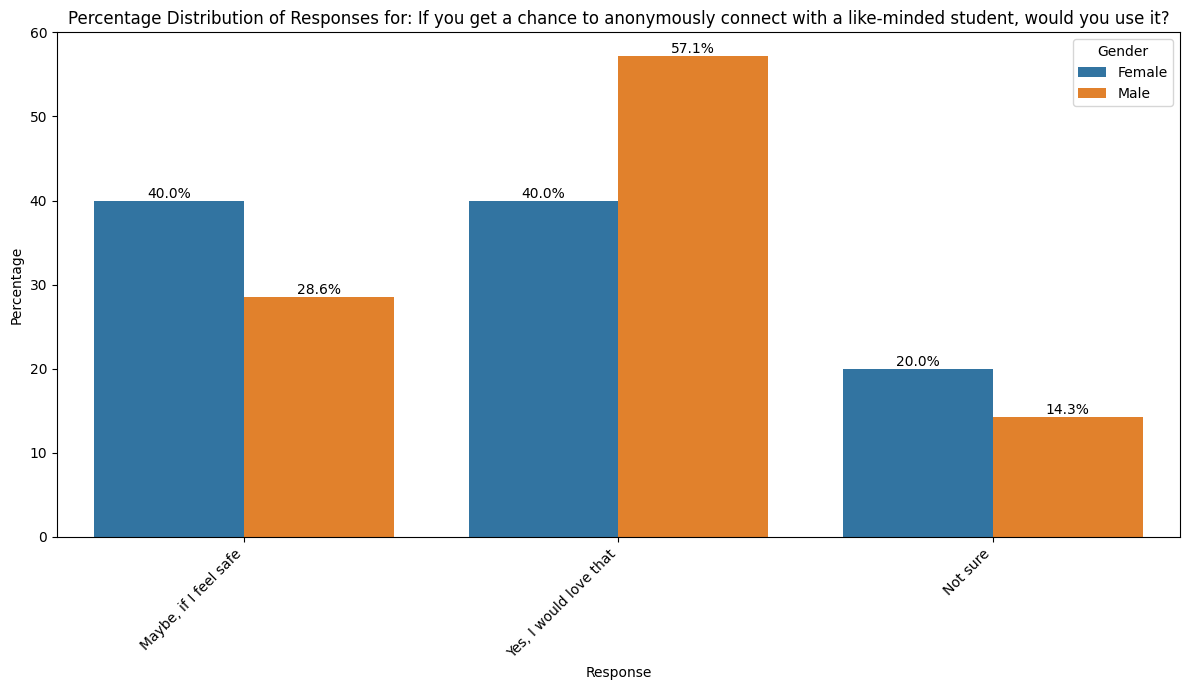

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for question, data in response_percentages_gender.items():
    plt.figure(figsize=(12, 7)) # Increased figure size for better readability
    ax = sns.barplot(x='Response', y='Percentage', hue='Gender', data=data)
    plt.title(f'Percentage Distribution of Responses for: {question}')
    plt.xlabel('Response')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')

    # Add percentage labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

* The data was successfully loaded from the Excel file.
* Missing values and data types were checked.
* The columns representing questions in the dataset were identified.
* The percentage distribution of responses for each question, categorized by gender, was calculated.
* Bar charts were generated to visualize the percentage distribution of responses by gender for each question.

### Insights or Next Steps

* Analyze the generated bar charts to identify patterns and differences in responses between genders for each question.
* Consider further analysis or visualizations based on other columns or combinations of columns to gain deeper insights into the data.